# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1950'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB421_1950-04-15_01-00004.txt',
 'KB_JB572_1950-06-07_01-00004.txt',
 'KB_JB773_1950-07-22_01-00010.txt',
 'KB_JB837_1950-12-01_01-00007.txt',
 'KB_JB838_1950-01-06_01-00002.txt']

In [7]:
texts = [open(data_path + f).read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

"L'AVENIR  DU  LUXEMBOURG \n\nSamedi 15 avri  j  350, \n\nFAUVILLERS \n\nNouveau  service  d'autobus \n\nNous  apprenons  avec  plaisir  que  les \nhabitués  ae  la  foire  de  Bastogne  vont \nvoit  leur  désir  se  réaliser. \n\nEn  effet,  un  service  régulier  d'auto \nbus  les  déposera,  les  jours  de  foire,  à  9 \nheures  du  matin,  sur  la  place  Mac  Au-\nliffe  pour  les  reprendre  a  13  h.,  ce"

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [12]:
# Détail de la matrice
tfidf_vectors

<1004x3491 sparse matrix of type '<class 'numpy.float64'>'
	with 704014 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

nt           0.199183
mlle         0.186903
foire        0.180828
s'est        0.180553
roi          0.169572
               ...   
elle-même    0.000000
empl         0.000000
emploi       0.000000
emplois      0.000000
♦            0.000000
Length: 3491, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.02964468, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.00342304, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

0.7386253843148253

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{0: ['KB_JB838_1950-01-08_01-00011.txt',
     'KB_JB838_1950-03-29_01-00008.txt',
     'KB_JB838_1950-04-21_01-00010.txt',
     'KB_JB838_1950-05-20_01-00016.txt',
     'KB_JB838_1950-06-04_01-00012.txt',
     'KB_JB838_1950-06-24_01-00011.txt',
     'KB_JB838_1950-06-25_01-00013.txt',
     'KB_JB838_1950-07-08_01-00009.txt',
     'KB_JB838_1950-07-20_01-00010.txt',
     'KB_JB838_1950-09-21_01-00009.txt',
     'KB_JB838_1950-10-15_01-00016.txt',
     'KB_JB838_1950-11-04_01-00012.txt',
     'KB_JB838_1950-11-09_01-00012.txt',
     'KB_JB838_1950-12-14_01-00011.txt',
     'KB_JB838_1951-01-04_01-00009.txt',
     'KB_JB838_1951-01-13_01-00012.txt',
     'KB_JB838_1951-01-23_01-00009.txt',
     'KB_JB838_1951-01-25_01-00010.txt',
     'KB_JB838_1951-02-03_01-00013.txt',
     'KB_JB838_1951-02-14_01-00009.txt',
     'KB_JB838_1951-02-24_01-00011.txt',
     'KB_JB838_1951-03-06_01-00010.txt',
     'KB_JB838_1951-04-11_01-00010.txt',
     'KB_JB838_1951-05-13_01-00015.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[-0.25177236,  0.06523555],
       [-0.07935167, -0.03468864],
       [-0.00646623, -0.12003912],
       [-0.10474428, -0.01664257],
       [-0.32542135,  0.11421116],
       [ 0.11431406, -0.30197357],
       [ 0.44416168, -0.25202464],
       [-0.23850418, -0.03783336],
       [-0.05138321, -0.10512644],
       [ 0.61331923,  0.50411334]])

### Générer le plot

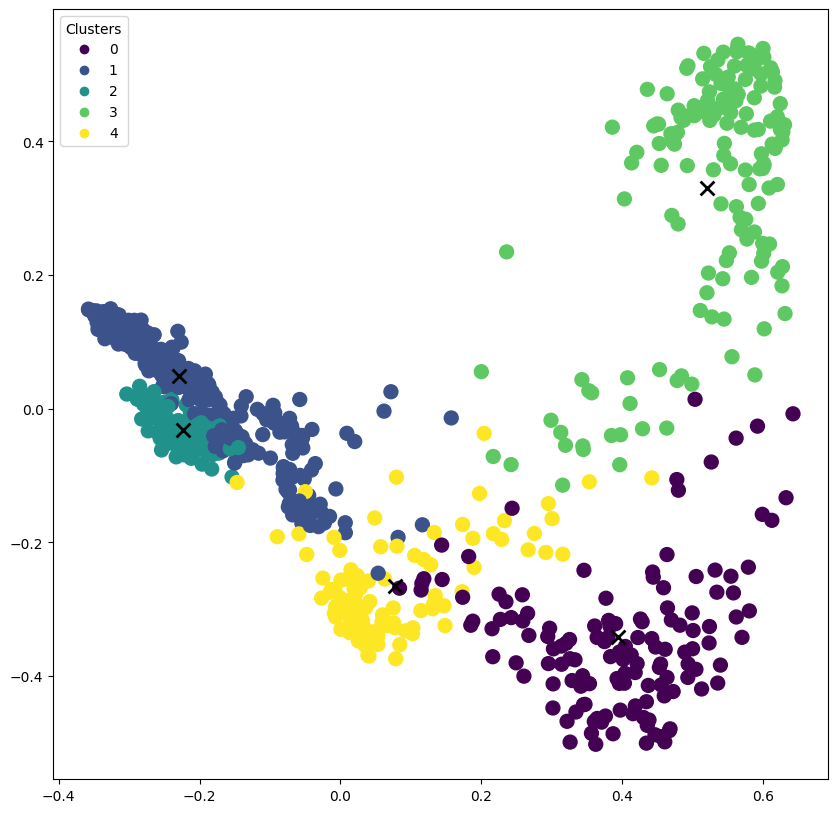

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")